In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/kaggle/input/crowd-counting/labels.csv')
df['image'] = df['id'].map('seq_{:06d}.jpg'.format)
df.head()

,id,count,image
0,1,35,seq_000001.jpg
1,2,41,seq_000002.jpg
2,3,41,seq_000003.jpg
3,4,44,seq_000004.jpg
4,5,41,seq_000005.jpg


In [3]:
df.describe()

,id,count
count,2000.000000,2000.000000
mean,1000.500000,31.157500
std,577.494589,6.945417
min,1.000000,13.000000
25%,500.750000,26.000000
50%,1000.500000,31.000000
75%,1500.250000,36.000000
max,2000.000000,53.000000


<Axes: >

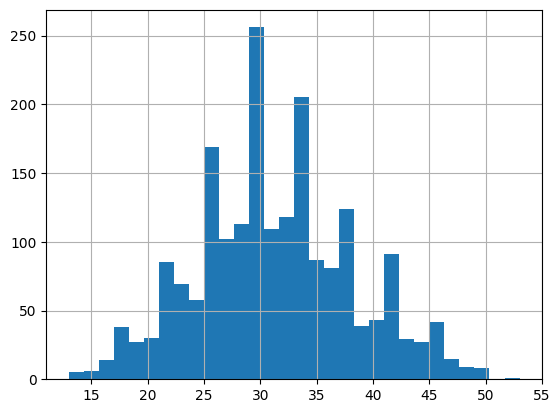

In [4]:
df['count'].hist(bins=30)

In [5]:
import numpy as np
images = np.load('/kaggle/input/crowd-counting/images.npy')

print(images.shape)
print(type(images))

(2000, 480, 640, 3)
<class 'numpy.ndarray'>


Showing Different Frames of a Camera


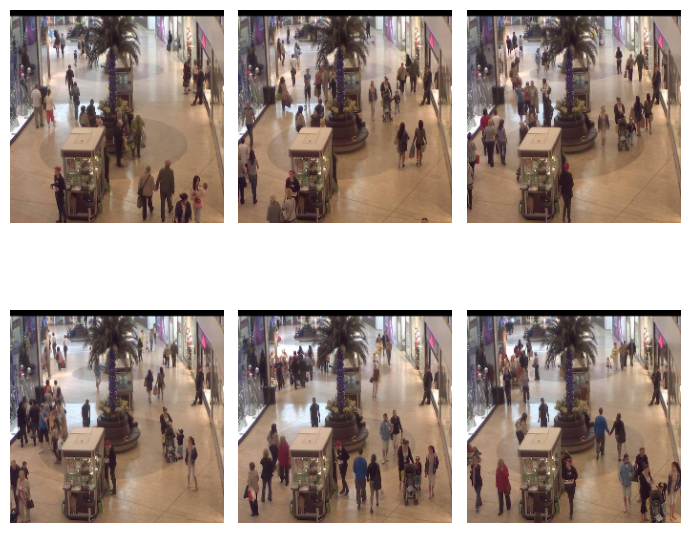

In [6]:
import cv2
images = np.array([cv2.resize(img, (224, 224)) for img in images])
fig, axs = plt.subplots(2, 3, figsize=(7, 7))
for i, ax in enumerate(axs.flat):
    ax.imshow(images[i])
    ax.axis('off')

plt.tight_layout()
print("Showing Different Frames of a Camera")
plt.show()

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [8]:
# Load images and labels
images = np.load('/kaggle/input/crowd-counting/images.npy')  # Shape should be (num_samples, height, width, channels)
labels_df = pd.read_csv('/kaggle/input/crowd-counting/labels.csv')  # Assuming it has columns 'id' and 'count'

# Check if the number of images matches the number of labels
assert len(images) == len(labels_df), "Mismatch between number of images and labels"

In [9]:
# Prepare labels (assuming 'id' corresponds to the index of images)
labels = labels_df['count'].values

# Normalize images
images = images.astype('float32') / 255.0

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

(480, 640, 3)


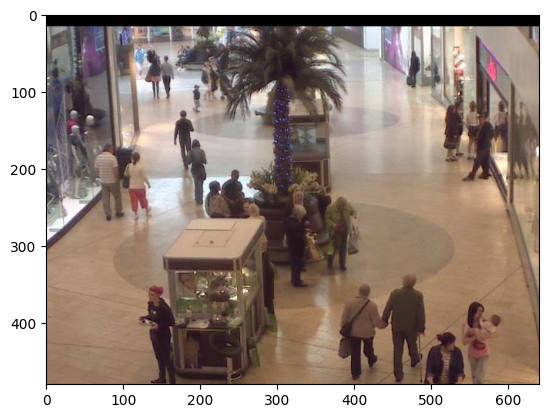

In [10]:
img = images[0]
print(images[0].shape)
plt.imshow(img)
plt.show()

In [11]:
# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(images.shape[1], images.shape[2], images.shape[3])),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)  # Output layer for count prediction
])
model

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Sequential name=sequential, built=True>

In [12]:
# Load the previously saved model
from tensorflow.keras.models import load_model
try:
    model = load_model('/kaggle/working/people_counting_model.h5')
except FileNotFoundError  as e:
    print("File Not Found")

File Not Found


In [13]:
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model

<Sequential name=sequential, built=True>

In [14]:
# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10


I0000 00:00:1731406882.574152      82 service.cc:145] XLA service 0x799654002d00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731406882.574201      82 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1731406882.574206      82 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1731406901.927879      82 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


50/50 ━━━━━━━━━━━━━━━━━━━━ 43s 432ms/step - loss: 246.7377 - mae: 11.9334 - val_loss: 59.9270 - val_mae: 6.0668
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 281ms/step - loss: 57.4713 - mae: 6.0291 - val_loss: 40.9312 - val_mae: 5.2393
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 283ms/step - loss: 42.8607 - mae: 5.1666 - val_loss: 19.8131 - val_mae: 3.4362
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 284ms/step - loss: 13.2499 - mae: 2.8893 - val_loss: 10.9014 - val_mae: 2.5695
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 286ms/step - loss: 7.7039 - mae: 2.2078 - val_loss: 12.0401 - val_mae: 2.8800
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 287ms/step - loss: 5.8956 - mae: 1.9361 - val_loss: 7.4827 - val_mae: 2.1478
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 290ms/step - loss: 3.0959 - mae: 1.4048 - val_loss: 7.2465 - val_mae: 2.0272
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 289ms/step - loss: 2.2282 - mae: 1.1708 - val_loss: 6.7015 - val_mae: 1.9628
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 292ms/

In [15]:
# Save model if needed
model.save('people_counting_model.h5')

In [16]:
# Example usage for prediction
def predict_count(image):
    image = np.expand_dims(image.astype('float32') / 255.0, axis=0)  # Normalize and add batch dimension
    return model.predict(image)[0][0]

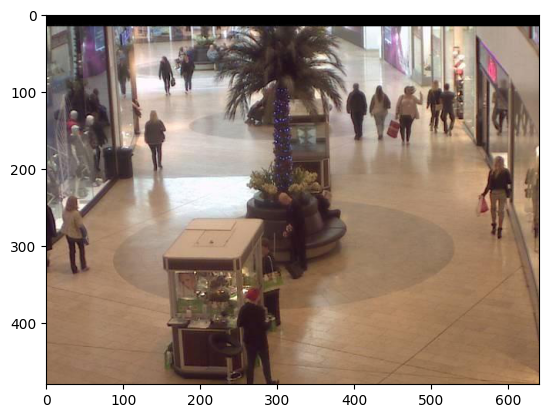

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 897ms/step
Predicted number of people: 18.24


In [17]:
# Load an example image for prediction (replace with your own image loading)
example_image = X_val[20]  # Just an example; replace with actual image loading logic.
plt.imshow(example_image)
plt.show()
predicted_count = predict_count(example_image)
print(f'Predicted number of people: {predicted_count:.2f}')

(640, 480, 3)


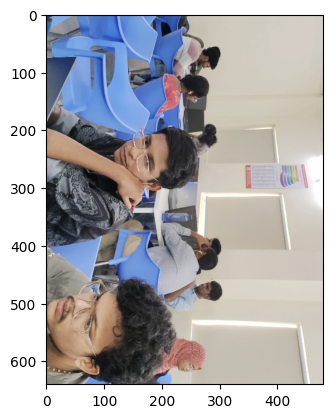

In [18]:
import matplotlib.image as mpimg
test_image = mpimg.imread('/kaggle/input/test-data/test_image.jpg')
print(test_image.shape)
test_image.reshape(480, 640 , 3)
plt.imshow(test_image)
plt.show()

In [19]:
predicted_count = predict_count(test_image)
print(f'Predicted number of people: {predicted_count:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step
Predicted number of people: 38.61
